# Machine à laver le linge

In [1]:
from scipy.io.wavfile import read
from numpy.fft import fft, fftfreq, ifft 
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np

In [2]:
samplerate, amplitude = read('data/machine_a_laver.wav')

In [3]:
print(f"Le taux d'échantillonnage : {samplerate} Hz")
delta_t = 1/samplerate
print(f"Le pas de temps : {delta_t*1e6:.2e} µs")
N = len(amplitude)
print(f"Le nombre de points : {N}")
T = N*delta_t
print(f"La durée de l'enregistrement : {T:.2f} s")

Le taux d'échantillonnage : 44100 Hz
Le pas de temps : 2.27e+01 µs
Le nombre de points : 414380
La durée de l'enregistrement : 9.40 s


Text(0, 0.5, 'Amplitude')

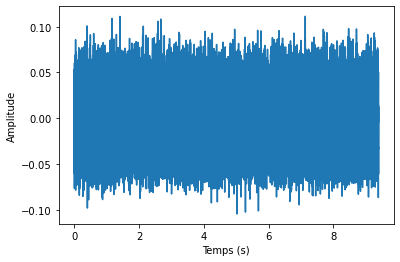

In [4]:
t = np.arange(N)*delta_t

plt.plot(t,amplitude)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')

In [5]:
amplitude_tilde = fft(amplitude)
freq = fftfreq(N, delta_t)

C:\Users\Administrator\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Amplitude')

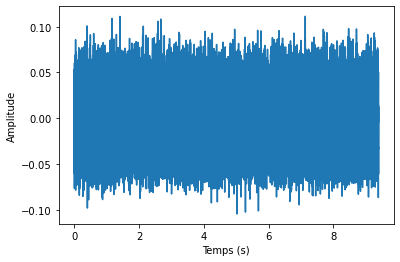

In [6]:
signal_retrouve = ifft(amplitude_tilde)

plt.plot(t, signal_retrouve)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')

La fréquence minimale : 0.106 Hz
1/T = 0.106 Hz
La fréquence maximale : 22050 Hz
fs/2 = 22050.0


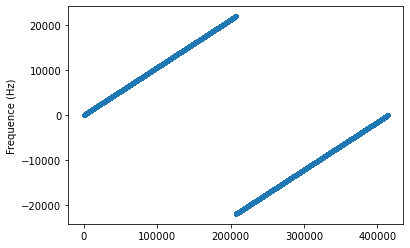

In [7]:
plt.plot(freq,'.')
plt.ylabel('Frequence (Hz)')
print(f"La fréquence minimale : {freq[1]-freq[0]:.3f} Hz")
print(f"1/T = {1/T:.3f} Hz")
print(f"La fréquence maximale : {max(freq):.0f} Hz")
print(f"fs/2 = {samplerate/2}")

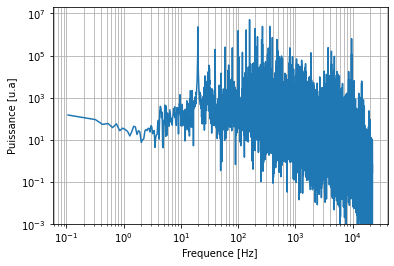

In [8]:
mask = freq > 0

fig = figure()
ax = fig.subplots(1, 1)

ax.loglog(freq[mask], np.abs(amplitude_tilde[mask])**2)
ax.set_ylim(1E-3, None)

ax.set_xlabel('Frequence [Hz]')
ax.set_ylabel('Puissance [u.a]')

ax.grid(which='both')

Text(0, 0.5, 'Puissance [u.a]')

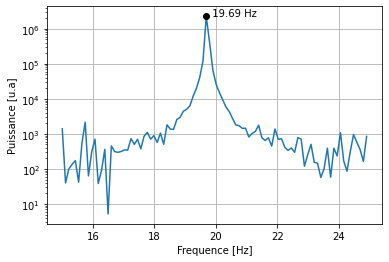

In [9]:
mask_zoom = np.abs(freq-20)<5

fig = figure()
ax = fig.subplots(1, 1)

ax.semilogy(freq[mask_zoom], np.abs(amplitude_tilde[mask_zoom])**2)
ax.grid()

i = np.argmax(np.abs(amplitude_tilde[mask_zoom])**2)
freq_max = freq[mask_zoom][i]
amp_max = np.abs(amplitude_tilde[mask_zoom][i])**2

ax.semilogy(freq_max, amp_max, 'ko')
ax.text(freq_max, amp_max, f'  {freq_max:.2f} Hz')

ax.set_xlabel('Frequence [Hz]')
ax.set_ylabel('Puissance [u.a]')

### Si on réduit le temps d'enregistrement

In [10]:
amplitude_bis = amplitude[:2*samplerate] # Les deux première secondes
amplitude_bis_tilde = fft(amplitude_bis)
freq_bis = fftfreq(len(amplitude_bis), delta_t)
mask_bis = freq_bis > 0

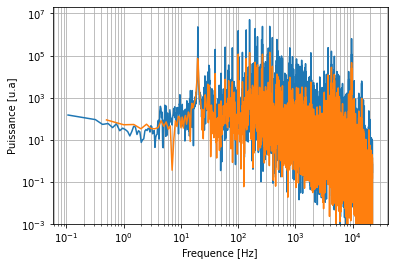

In [11]:
fig = figure()
ax = fig.subplots(1, 1)

ax.loglog(freq[mask], np.abs(amplitude_tilde[mask])**2)
ax.loglog(freq_bis[mask_bis], np.abs(amplitude_bis_tilde[mask_bis])**2)
ax.set_ylim(1E-3, None)

ax.set_xlabel('Frequence [Hz]')
ax.set_ylabel('Puissance [u.a]')

ax.grid(which='both')

Text(0, 0.5, 'Puissance [u.a]')

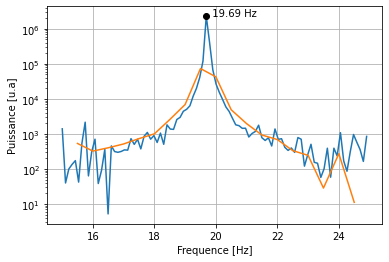

In [12]:
mask_bis_zoom = np.abs(freq_bis-20)<5

fig = figure()
ax = fig.subplots(1, 1)

ax.semilogy(freq[mask_zoom], np.abs(amplitude_tilde[mask_zoom])**2)
ax.semilogy(freq_bis[mask_bis_zoom], np.abs(amplitude_bis_tilde[mask_bis_zoom])**2)
ax.grid()

ax.semilogy(freq_max, amp_max, 'ko')
ax.text(freq_max, amp_max, f'  {freq_max:.2f} Hz')

ax.set_xlabel('Frequence [Hz]')
ax.set_ylabel('Puissance [u.a]')

### Si on filtre le signal

Filtre causal : 
$$ H(\omega) = \frac{1}{1+i(\omega \tau)} $$

In [13]:
fc = 30 # Hz
tau = 1/fc

H = 1/(1+1J*(2*np.pi*freq*tau))

Text(0, 0.5, 'Puissance [u.a]')

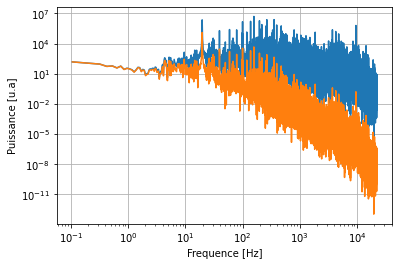

In [14]:
amplitude_tilde_filtree = H*amplitude_tilde

fig = figure()
ax = fig.subplots(1, 1)

ax.loglog(freq[mask],np.abs(amplitude_tilde[mask])**2)
ax.loglog(freq[mask],np.abs(amplitude_tilde_filtree[mask])**2)
ax.grid()
ax.set_xlabel('Frequence [Hz]')
ax.set_ylabel('Puissance [u.a]')

C:\Users\Administrator\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Temps (s)')

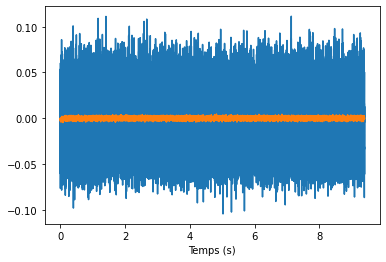

In [15]:
amplitude_filtree = ifft(amplitude_tilde_filtree)

fig = figure()
ax = fig.subplots(1, 1)
ax.plot(t,amplitude)
ax.plot(t,amplitude_filtree)
ax.set_xlabel('Temps (s)')

C:\Users\Administrator\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


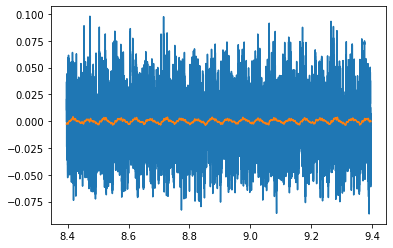

In [16]:
fig = figure()
ax = fig.subplots(1, 1)
ax.plot(t[-samplerate:],amplitude[-samplerate:])
ax.plot(t[-samplerate:],amplitude_filtree[-samplerate:])